### Visualisation des données historiques de William Playfair : Analyse du prix du blé et des salaires (1565-1821)

Les travaux de William Playfair ont introduit des façons pionnières de représenter graphiquement des données économiques. Ici, nous cherchons à recréer son graphique de l’évolution du prix du blé et des salaires hebdomadaires, en intégrant des techniques modernes de visualisation. Nous allons d'abord charger les données de prix du blé et de salaires, puis produire plusieurs représentations graphiques pour illustrer l’évolution des salaires et du pouvoir d’achat au cours du temps.

Nous commençons par charger et examiner les premières lignes du jeu de données.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"
data = pd.read_csv(url)

# Afficher les premières lignes du fichier CSV récupéré
data.head()

rownames  Year  Wheat  Wages
0         1  1565   41.0   5.00
1         2  1570   45.0   5.05
2         3  1575   42.0   5.08
3         4  1580   49.0   5.12
4         5  1585   41.5   5.15

### Reproduction du graphique de Playfair

Le graphique original de Playfair représente le prix du blé sous forme de barres verticales et les salaires comme une ligne colorée superposée, avec une zone colorée en bleu sous la courbe. Cette approche aide à visualiser la différence entre le coût de la vie et le revenu moyen sur une même période.

Nous recréons ici cette mise en page en utilisant un histogramme pour les prix du blé et une ligne avec remplissage pour les salaires.

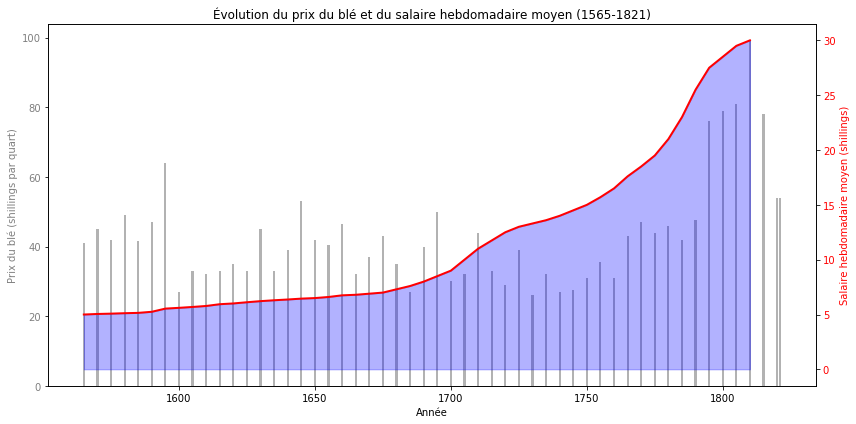

In [2]:
# Initialiser la figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer les barres pour le prix du blé
ax1.bar(data['Year'], data['Wheat'], color='grey', label="Prix du blé (shillings par quart)", alpha=0.6)
ax1.set_xlabel("Année")
ax1.set_ylabel("Prix du blé (shillings par quart)", color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Tracer la surface colorée pour les salaires
ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Wages'], color='red', label="Salaire hebdomadaire moyen (shillings)", linewidth=2)
ax2.fill_between(data['Year'], data['Wages'], color='blue', alpha=0.3)
ax2.set_ylabel("Salaire hebdomadaire moyen (shillings)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titre et légende
plt.title("Évolution du prix du blé et du salaire hebdomadaire moyen (1565-1821)")
fig.tight_layout()
plt.show()

### Présentation améliorée avec deux axes pour les unités distinctes

La représentation précédente combine les deux variables dans un même graphique sans distinction d’unités. Afin de clarifier l’interprétation, nous introduisons ici deux axes verticaux séparés. L’axe gauche indique le prix du blé en shillings par quart, tandis que l’axe droit affiche les salaires hebdomadaires. Cette séparation permet de mieux observer la dynamique des deux courbes sans confusion.

De plus, cette présentation facilite l’interprétation des tendances relatives entre le coût de vie et les revenus.

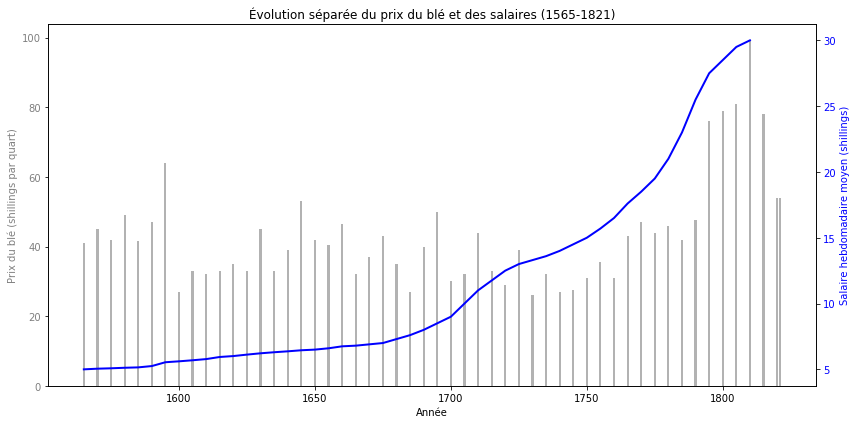

In [3]:
# Initialiser la figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer le prix du blé avec des barres
ax1.bar(data['Year'], data['Wheat'], color='grey', label="Prix du blé (shillings par quart)", alpha=0.6)
ax1.set_xlabel("Année")
ax1.set_ylabel("Prix du blé (shillings par quart)", color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Tracer les salaires avec une ligne
ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Wages'], color='blue', label="Salaire hebdomadaire moyen (shillings)", linewidth=2)
ax2.set_ylabel("Salaire hebdomadaire moyen (shillings)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Titre et légende
plt.title("Évolution séparée du prix du blé et des salaires (1565-1821)")
fig.tight_layout()
plt.show()

### Calcul du pouvoir d'achat : quantité de blé achetable avec le salaire hebdomadaire

Pour évaluer l’évolution du pouvoir d’achat des ouvriers, nous calculons la quantité de blé qu’un travailleur moyen pouvait acheter avec son salaire hebdomadaire. Cette mesure, exprimée en quart de blé, est obtenue en divisant le salaire hebdomadaire par le prix du blé.

Le graphique suivant montre l’évolution de ce pouvoir d’achat au fil du temps, indiquant l’augmentation ou la diminution de la capacité des ouvriers à acheter des denrées de première nécessité.

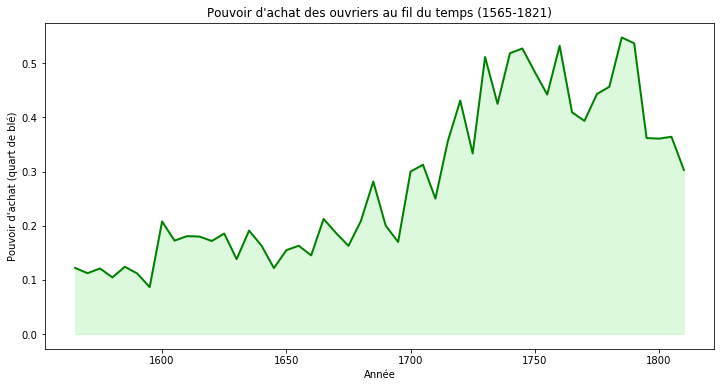

In [4]:
# Calcul du pouvoir d'achat
data['Pouvoir d\'achat (quart de blé)'] = data['Wages'] / data['Wheat']

# Tracer le pouvoir d'achat
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Pouvoir d\'achat (quart de blé)'], color='green', linewidth=2)
plt.fill_between(data['Year'], data['Pouvoir d\'achat (quart de blé)'], color='lightgreen', alpha=0.3)
plt.xlabel("Année")
plt.ylabel("Pouvoir d'achat (quart de blé)")
plt.title("Pouvoir d'achat des ouvriers au fil du temps (1565-1821)")
plt.show()

### Comparaison du prix du blé et des salaires sans l'axe du temps

En étudiant la relation entre le prix du blé et les salaires sans prendre en compte directement l'axe temporel, on peut observer la dynamique entre ces deux variables sous une forme différente. Dans ce graphique, les points sont colorés en fonction de l’année, permettant de suivre l’évolution temporelle de la relation.

Cette représentation en couleur indique comment les salaires et le prix du blé ont évolué dans le temps sans recourir à un axe temporel, facilitant une analyse de leur corrélation relative.

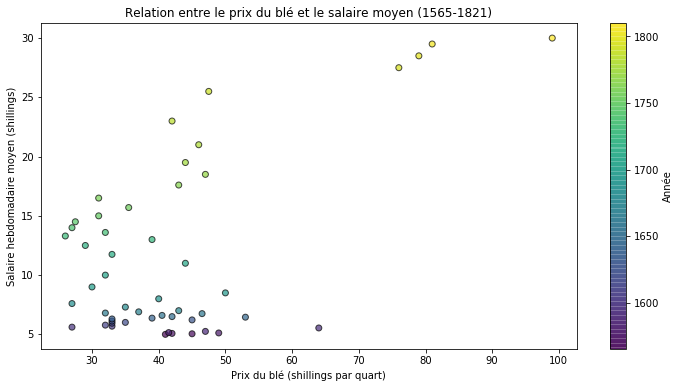

In [5]:
# Représenter les salaires par rapport au prix du blé avec une couleur qui montre l'année
plt.figure(figsize=(12, 6))
scatter = plt.scatter(data['Wheat'], data['Wages'], c=data['Year'], cmap='viridis', edgecolor='k', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label("Année")

plt.xlabel("Prix du blé (shillings par quart)")
plt.ylabel("Salaire hebdomadaire moyen (shillings)")
plt.title("Relation entre le prix du blé et le salaire moyen (1565-1821)")
plt.show()

### Conclusion

À travers ces graphiques, nous avons exploré différentes perspectives pour analyser les données historiques de Playfair sur le prix du blé et les salaires. En séparant les axes de chaque variable et en calculant le pouvoir d’achat, nous mettons en lumière les tendances économiques sous-jacentes, en particulier l’évolution du bien-être financier des travailleurs à travers les siècles. Ces visualisations offrent des moyens modernes d’analyser et d’interpréter les mêmes données qu’étudiait Playfair, en permettant une compréhension plus nuancée des variations du pouvoir d’achat et de la relation entre les prix des denrées alimentaires et les salaires.